In [1]:
#호텔 1일 체크인 가격 크롤링
#올마이투어 #야놀자

from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen, Request

#체크인 조회 일자 입력
chekin_date = input("'2000-01-01' 형식으로 체크인 날짜를 입력해 주세요: ")

#야놀자 사이트 크롤링 시 필요한 형태로 최적화
chekin_date_yanolja = chekin_date + '&checkOutDate=' + (chekin_date[:-2] + (str(int(chekin_date[-2:]) + 1) if int(chekin_date[-2:]) + 1 > 10 else str(0) + str(int(chekin_date[-2:]) + 1)))


hotel_name_allmytour = ['더리버사이드호텔', '호텔 안테룸', '호텔 파티오세븐']
hotel_name_yanolja = ['호텔 선샤인 서울', '호텔 티롤', 'LEX관광호텔']

base_url = ['https://www.allmytour.com/products/2967?checkInDate=', #더리버사이드호텔
        'https://www.allmytour.com/products/5403?checkInDate=', #호텔 안테룸
        'https://www.allmytour.com/products/284?checkInDate=' #호텔 파티오세븐
            ]

base_url_yanolja = ['https://place-site.yanolja.com/places/3000628?checkInDate=', #호텔 선샤인
                'https://place-site.yanolja.com/places/3001502?checkInDate=',#호텔 티롤
                    'https://place-site.yanolja.com/places/10047555?checkInDate=' #LEX관광호텔
]


for i in range(len(hotel_name_allmytour)):
  html = base_url[i] + chekin_date
  req = Request(html)
  response = urlopen(req)
  soup = BeautifulSoup(response, 'html.parser')

  try:
     price = soup.find('span', class_='tw-text-headLine2 tw-flex tw-items-center').text.strip(' ~')
     print(hotel_name_allmytour[i],' 1일 숙박가: ',price, sep='')

  except:
    print(hotel_name_allmytour[i],' 1일 숙박가: ','만실입니다', sep='')

for i in range(len(hotel_name_yanolja)):

  html_yanolja = base_url_yanolja[i] + chekin_date_yanolja
  req_yanolja = Request(html_yanolja)
  response_yanolja = urlopen(req_yanolja)
  soup_yanolja =  BeautifulSoup(response_yanolja, 'html.parser')
  try:

     price_yanolja = soup_yanolja.find('div', class_='css-13bialb').find('span').text
     print(hotel_name_yanolja[i],' 1일 숙박가: ',price_yanolja, sep='')

  except:
    print(hotel_name_yanolja[i],' 1일 숙박가: ','만실입니다', sep='')

print('------------------------------------')
print('작업을 완료하였습니다. ')

'2000-01-01' 형식으로 체크인 날짜를 입력해 주세요: 2024-05-02
더리버사이드호텔 1일 숙박가: 만실입니다
호텔 안테룸 1일 숙박가: 333,300원
호텔 파티오세븐 1일 숙박가: 246,000원
호텔 선샤인 서울 1일 숙박가: 208,000
호텔 티롤 1일 숙박가: 99,000
LEX관광호텔 1일 숙박가: 111,000
------------------------------------
작업을 완료하였습니다. 


In [3]:
#호텔 월별 체크인 가격 크롤링 후 엑셀파일 만들기
#올마이투어 #야놀자

import urllib
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

chekin_month = input("'2000-01' 형식으로 체크인 연월를 입력해 주세요: ")
print(' ')
days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
dates = [chekin_month + '-' + i for i in days]

hotel_name_allmytour = ['더리버사이드호텔', '호텔 안테룸', '호텔 파티오세븐']
base_url_hotel_name_allmytour = ['https://www.allmytour.com/products/2967?checkInDate=', #더리버사이드호텔
        'https://www.allmytour.com/products/5403?checkInDate=', #호텔 안테룸
        'https://www.allmytour.com/products/284?checkInDate=' #호텔 파티오세븐
        ]

prices_riverside = []; prices_anteroom = []; prices_patio7 = []
prices_allmytour = [prices_riverside, prices_anteroom, prices_patio7]

hotel_name_yanolja = ['호텔 선샤인 서울', '호텔 티롤', 'LEX관광호텔']
base_url_yanolja = ['https://place-site.yanolja.com/places/3000628?checkInDate=', #호텔 선샤인
                'https://place-site.yanolja.com/places/3001502?checkInDate=', #호텔 티롤
                    'https://place-site.yanolja.com/places/10047555?checkInDate=' #LEX관광호텔
]
prices_sunshine = []; prices_tiroll = [] ; prices_lextouristhotel = []
prices_yanolja = [prices_sunshine, prices_tiroll, prices_lextouristhotel]

print('올마이투어에서 가격 정보를 수집합니다')
for i in tqdm(range(len(hotel_name_allmytour))):
  for j in range(len(days)):
    html_allmytour = base_url_hotel_name_allmytour[i] + chekin_month + '-' + days[j]
    req_allmytour = Request(html_allmytour)
    response_allmytour = urlopen(req_allmytour)
    soup_allmytour = BeautifulSoup(response_allmytour, 'html.parser')

    try:
          price_allmytour = soup_allmytour.find('span', class_='tw-text-headLine2 tw-flex tw-items-center').text.strip('원 ~')
          prices_allmytour[i].append(price_allmytour)

    except:
       prices_allmytour[i].append(0)

print('올마이투어 가격 정보 수집이 완료되었습니다: 더리버사이드호텔, 호텔 안테룸, 호텔 파티오세븐')
print(' ')

print('야놀자에서 가격 정보를 수집합니다')
for i in tqdm(range(len(hotel_name_yanolja))):
  for j in range(len(days)):
    html_yanolja = base_url_yanolja[i] + chekin_month + '-' + days[j]
    req_yanolja = Request(html_yanolja)
    response_yanolja = urlopen(req_yanolja)
    soup_yanolja = BeautifulSoup(response_yanolja, 'html.parser')

    try:
          price_yanolja = soup_yanolja.find('div', class_='css-13bialb').find('span').text
          prices_yanolja[i].append(price_yanolja)

    except:
       prices_yanolja[i].append(0)

print('야놀자 가격 정보 수집이 완료되었습니다: 호텔 선샤인 서울, 호텔 티롤')
print(' ')

date_df = pd.DataFrame(data=dates)
date_df.columns = ['날짜']

df_allmytour = pd.DataFrame(data=prices_allmytour).transpose()
df_yanolja = pd.DataFrame(data=prices_yanolja).transpose()

df_allmytour.columns = hotel_name_allmytour
df_yanolja.columns = hotel_name_yanolja

df = date_df.join(df_allmytour).join(df_yanolja)

df.set_index(keys='날짜', inplace=True)

df.to_excel('/content/drive/MyDrive/경쟁사_가격_비교.xlsx')

print('파일을 저장하였습니다. 구글드라이브를 확인해 주세요: 경쟁사_가격_비교.xlsx')
print('https://drive.google.com/drive/home')



'2000-01' 형식으로 체크인 연월를 입력해 주세요: 2024-05
 
올마이투어에서 가격 정보를 수집합니다


100%|██████████| 3/3 [02:30<00:00, 50.30s/it]


올마이투어 가격 정보 수집이 완료되었습니다: 더리버사이드호텔, 호텔 안테룸, 호텔 파티오세븐
 
야놀자에서 가격 정보를 수집합니다


100%|██████████| 3/3 [01:24<00:00, 28.04s/it]


야놀자 가격 정보 수집이 완료되었습니다: 호텔 선샤인 서울, 호텔 티롤
 
파일을 저장하였습니다. 구글드라이브를 확인해 주세요: 경쟁사_가격_비교.xlsx
https://drive.google.com/drive/home


In [4]:
#코랩 한글설정

%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정


Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


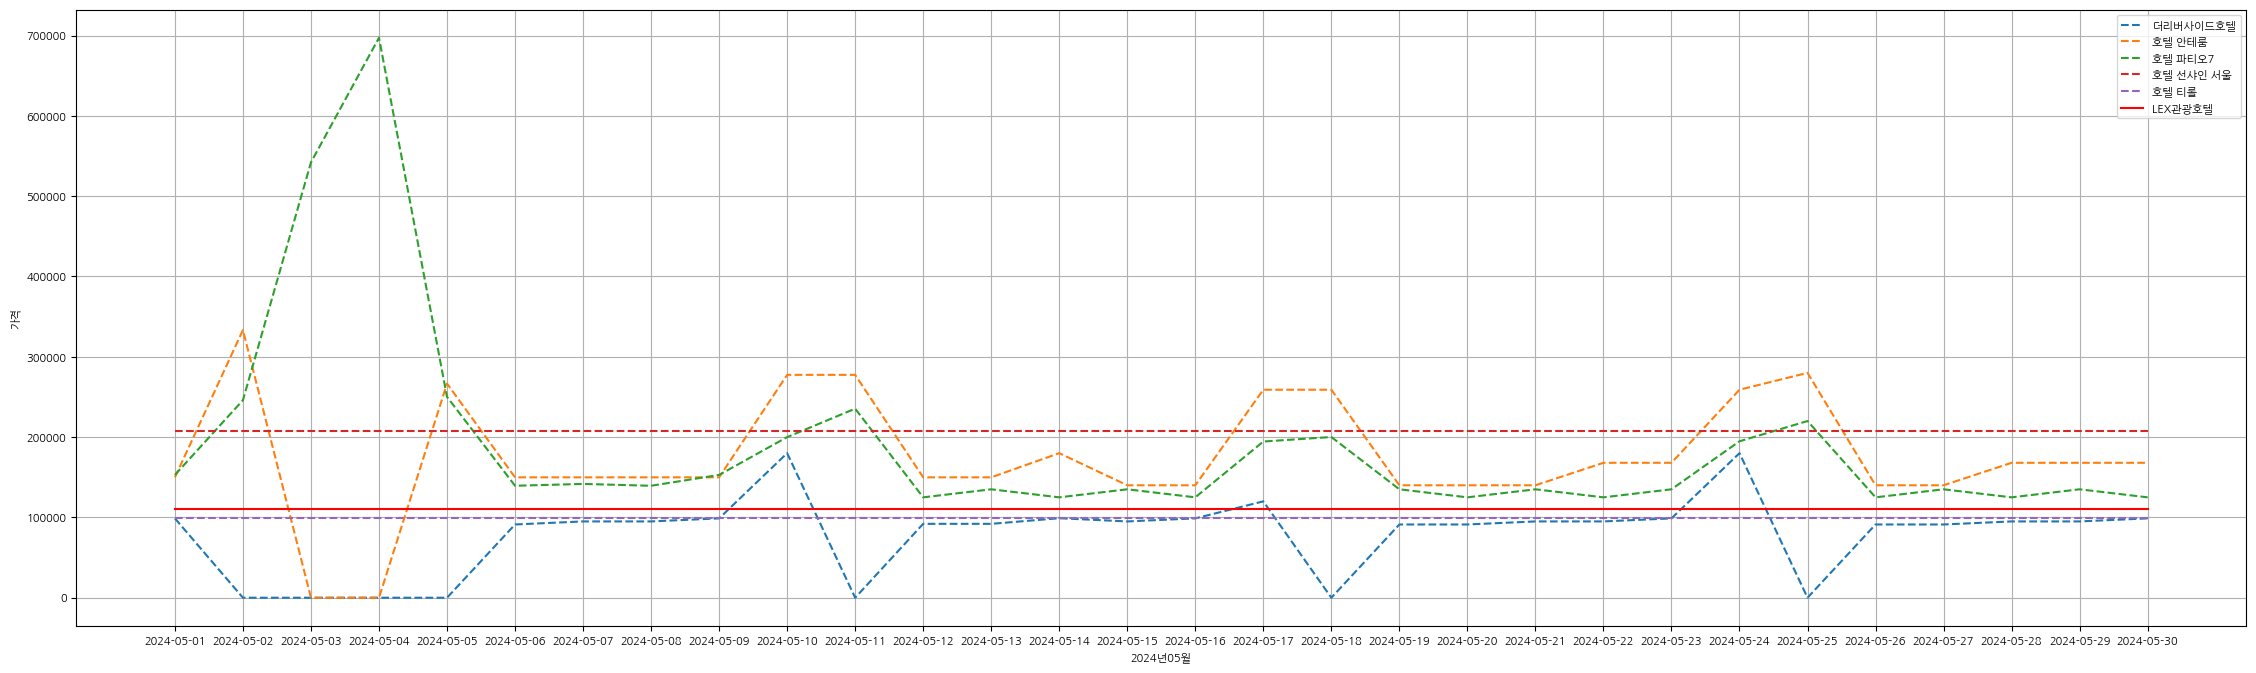

In [6]:
#그래프 시각화 (2번 실행해야 합니다)
# https://post.naver.com/viewer/postView.naver?volumeNo=31655657&memberNo=21815&vType=VERTICAL
# !! https://wikidocs.net/92071 참조 !!

import matplotlib.pyplot as plt
import numpy as np

all_hotel_names = hotel_name_allmytour + hotel_name_yanolja
all_hotel_prices = prices_allmytour + prices_yanolja

date_df = pd.DataFrame(data=dates)
date_df.columns = ['날짜']

df_allmytour = pd.DataFrame(data=prices_allmytour).transpose()
df_yanolja = pd.DataFrame(data=prices_yanolja).transpose()
df_allmytour.columns = hotel_name_allmytour
df_yanolja.columns = hotel_name_yanolja
df = date_df.join(df_allmytour).join(df_yanolja)

all_hotel_names = hotel_name_allmytour + hotel_name_yanolja
all_hotel_prices = prices_allmytour + prices_yanolja

prices_riverside2 = []; prices_anteroom2 = []; prices_patio72 = []; prices_sunshine2 = []; prices_tiroll2 = [] ; prices_lextouristhotel2 = []
all_hotel_prices2 = [prices_riverside2, prices_anteroom2, prices_patio72, prices_sunshine2, prices_tiroll2, prices_lextouristhotel2]

for i in range(len(all_hotel_prices2)):
  for j in range(len(days)):
    try:
      all_hotel_prices2[i].append(int(all_hotel_prices[i][j].replace(',', '')))

    except:
      all_hotel_prices2[i].append(0)

plt.plot(dates, prices_riverside2,'--',label='더리버사이드호텔')
plt.plot(dates, prices_anteroom2,'--',label='호텔 안테룸')
plt.plot(dates, prices_patio72,'--',label='호텔 파티오7')
plt.plot(dates, prices_sunshine2,'--',label='호텔 선샤인 서울')
plt.plot(dates, prices_tiroll2,'--',label='호텔 티롤',)
plt.plot(dates, prices_lextouristhotel2, 'r-',label='LEX관광호텔')

chekin_month_label = chekin_month.replace('-', '년') + '월'
plt.xlabel(chekin_month_label)
plt.ylabel('가격')

plt.rcParams['figure.figsize'] = (28, 8)
plt.rcParams['font.size'] = 8

plt.grid(True)
plt.legend()

plt.savefig('/content/drive/MyDrive/prices_of_hotels.png', facecolor='#eeeeee')
plt.show()



---

#https://www.similarweb.com/ 트래픽 조회 사이트
https://blog.naver.com/swcha1977/222061971487 설명 블로그